# Time Evolution of Wavefunctions

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

Gaussian wavefunction:
$$ G_\sigma(x) = \left(\frac{1}{\sigma^2\pi}\right)^{1/4} \exp\left(-\frac{(x-x')^2}{2\sigma^2}\right) $$

In [29]:
def gaussian_fn(x, xp, sigma):
    return (1/(sigma**2*np.pi)**0.25) * np.exp(-(x-xp)**2/(2*sigma**2))

Wavefunction for free particle:
$$ \psi(x) = \left(\frac{1}{\sigma^2\pi}\right)^{1/4} \exp\left(-\frac{(x-x')^2}{2\sigma^2}\right) \exp(ik_0x) $$

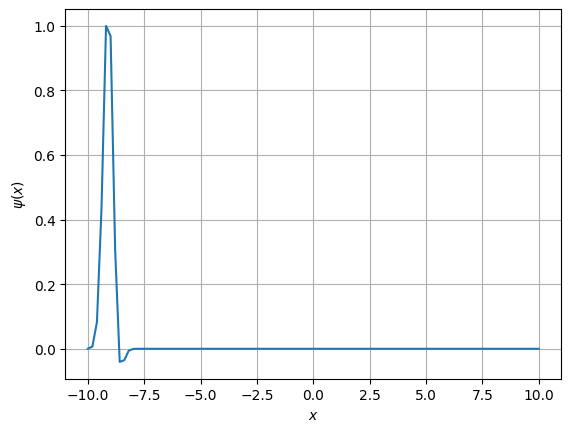

In [30]:
x = np.linspace(-10, 10, 100)
dx = x[1] - x[0]
psis = gaussian_fn(x, -9, 0.25)*np.exp(1j*2*x)  # INPUT - wavefunction

plt.plot(x, psis)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.grid()
plt.show()

## Method

$$ \psi(x) = \frac{1}{\sqrt{2\pi}} \int a(k) \exp(ikx) dk $$
So, by Fourier transform,
$$ a(k) = \frac{1}{\sqrt{2\pi}} \int \psi(x) \exp(-ikx) dx $$

Then the time dependent wavefunction will be,
$$ \Psi(x, t) = \frac{1}{\sqrt{2\pi}} \int a(k) \exp(ikx-i\omega(k)t) dk $$
where, $\omega(k)$ will be according to the dispersion relation of the medium.
Here for free particle,
$$ \omega(k) = v_gk + \alpha k^2 + ... $$
where $v_g$ is the group velocity.

In [31]:
k = np.linspace(-20, 20, 200) # INPUT - same kind of limit that of x
dk = k[1] - k[0]

def eig_vec_kspace(k, psi):
    ak = []
    for ki in k:
        # aki = (1/np.sqrt(2*np.pi))*simps(psi*np.exp(-1j*ki*x), x)
        aki = (1/np.sqrt(2*np.pi))*np.sum(psi*np.exp(-1j*ki*x)*dx)
        ak.append(aki)
    return np.array(ak)

def prob_den_kspace(k, psi):
    return np.abs(eig_vec_kspace(k, psi))**2

def eig_vec_return(k, psi):
    psix = []
    for xi in x:
        # psixi = (1/np.sqrt(2*np.pi))*simps(eig_vec_kspace(k, psi)*np.exp(1j*k*xi), k)
        psixi = (1/np.sqrt(2*np.pi))*np.sum(eig_vec_kspace(k, psi)*np.exp(1j*k*xi)*dk)
        psix.append(psixi)
    return np.array(psix)

def prob_den_return(k, psi):
    return np.abs(eig_vec_return(k, psi))**2

def omega(k):
    return 4*k +0.4*k**2   # INPUT

t = np.linspace(0, 2.5, 6)   # INPUT

def time_dep_wavefn(t, k, psi):
    psixt = []
    for ti in t:
        psix = []
        for xi in x:
            # psixi = (1/np.sqrt(2*np.pi))*simps(eig_vec_kspace(k,psi)*np.exp(1j*k*xi-1j*omega(k)*ti), k)
            psixi = (1/np.sqrt(2*np.pi))*np.sum(eig_vec_kspace(k,psi)*np.exp(1j*k*xi-1j*omega(k)*ti)*dk)
            psix.append(psixi)
        psixt.append(psix)
    return np.array(psixt)
def time_dep_prob_den(t, k, psi):
    return np.abs(time_dep_wavefn(t, k, psi)**2)

Momentum distribution

Normalization check: 1.0006485237601124


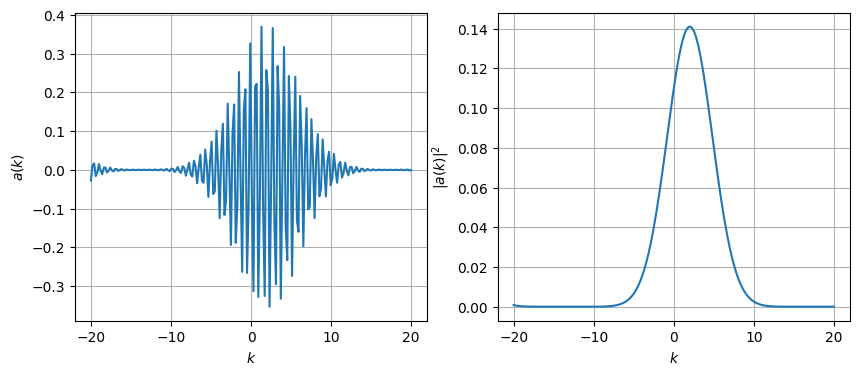

In [32]:
print(f'Normalization check: {simps(prob_den_kspace(k, psis), k)}')
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(k, eig_vec_kspace(k, psis))
plt.xlabel('$k$')
plt.ylabel('$a(k)$')
plt.grid()
plt.subplot(122)
plt.plot(k, prob_den_kspace(k, psis))
plt.xlabel('$k$')
plt.ylabel('$|a(k)|^2$')
plt.grid()
plt.show()

Checking accuracy of Fourier Transform

checking accuracy of Fourier Transform
-0.010289304179519322
-0.010289304179519298


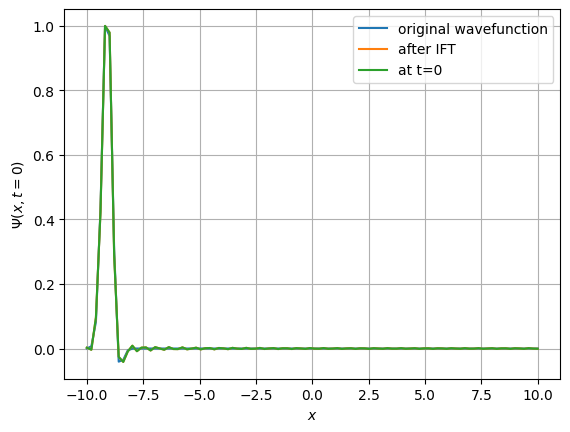

In [33]:
print('checking accuracy of Fourier Transform')
print(np.sum(np.abs(np.abs(psis))**2-prob_den_return(k, psis)))
print(np.sum(np.abs(np.abs(psis))**2-time_dep_prob_den(t, k, psis)[0]))

plt.plot(x, psis, label='original wavefunction')
plt.plot(x, eig_vec_return(k, psis), label='after IFT')
plt.plot(x, time_dep_wavefn(t, k, psis)[0], label='at t=0')
plt.xlabel('$x$')
plt.ylabel('$\Psi(x, t=0)$')
plt.legend()
plt.grid()
plt.show()

Uncertainty

In [34]:
psi = time_dep_wavefn(t, k, psis)[0]

def expectation_val_x(psi):
    return simps(x*np.abs(psi)**2, x)
def expectation_val_x2(psi):
    return simps(x**2*np.abs(psi)**2, x)
def uncertainty_x(psi):
    return np.abs(expectation_val_x2(psi)-(expectation_val_x(psi)**2))**0.5

def expectation_val_k(psi):
    return simps(k*prob_den_kspace(k, psi), k)
def expectation_val_k2(psi):
    return simps(k**2*prob_den_kspace(k, psi), k)
def uncertainty_k(psi):
    return np.abs(expectation_val_k2(psi)-(expectation_val_k(psi)**2))**0.5
def uncertainty_xk(psi):
    return uncertainty_x(psi)*uncertainty_k(psi)

print(uncertainty_xk(psi))

1.1043375423363577


In [35]:
np.sum(np.abs(psi-psis))

0.3489453001121224

In [36]:
uncertainty_xk(psis)   # compare with 0.5 (as hcut=1)

0.5077106665227368

In [37]:
(expectation_val_x2(psi) - expectation_val_x(psi)**2)**0.5

C:\Users\suman\AppData\Local\Temp\ipykernel_24688\2441885757.py:1: RuntimeWarning: invalid value encountered in scalar power
  (expectation_val_x2(psi) - expectation_val_x(psi)**2)**0.5


nan

In [38]:
((-0.11501683611393787)**0.5)

(2.0766416706589873e-17+0.3391413217435143j)

Time evolution of Wavefunction

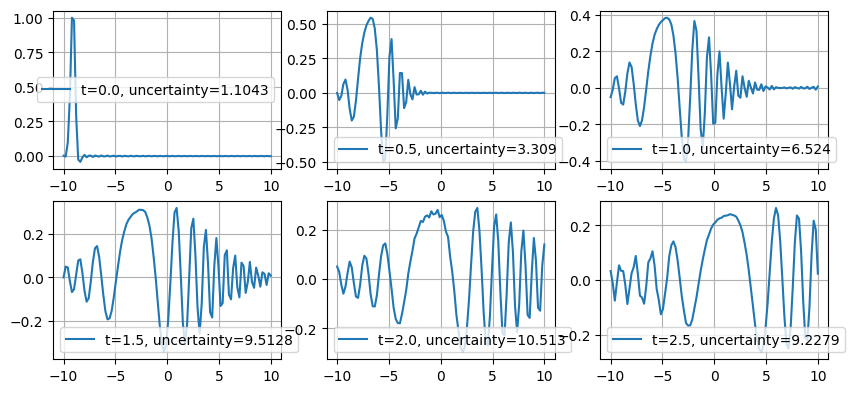

In [39]:
timecount = 0
plt.figure(figsize=(10, 7))  # INPUT
for psix in time_dep_wavefn(t, k, psis):
    plt.subplot(t.size//3 +1, 3, timecount+1)
    plt.plot(x, psix, label=f't={t[timecount]:.5}, uncertainty={uncertainty_xk(psix):.5}')
    timecount += 1
    plt.grid()
    plt.legend()
plt.show()

Time evolution of Probability Density

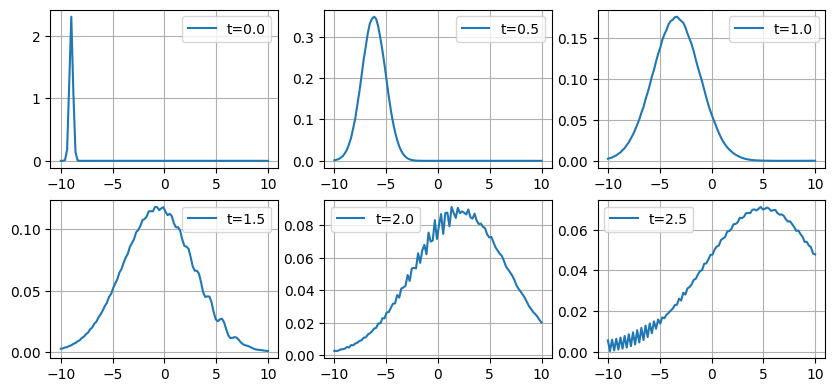

In [40]:
timecount = 0
plt.figure(figsize=(10, 7))  # INPUT
for psix in time_dep_prob_den(t, k, psis):
    plt.subplot(t.size//3 +1, 3, timecount+1)
    plt.plot(x, psix, label=f't={t[timecount]:.6}')
    timecount += 1
    plt.grid()
    plt.legend()
plt.show()

## Another way
(Unsuccessful)

Using `scipy.fft`

In [41]:
import scipy.fft as sfft

In [42]:
ak1 = sfft.fft(psis, x.size)   #[:len(x)//2]
k1 = sfft.fftfreq(x.size, np.diff(x)[0])    #[:len(x)//2]
# ak = sfft.fftshift(ak1)
# k = sfft.fftshift(k1)
xr1 = sfft.fftfreq(k1.size, np.diff(k1)[0])
psisr1 = sfft.ifft(ak1, k1.size)
# xr = sfft.ifftshift(xr1)
# psisr = sfft.ifftshift(psisr1)

In [43]:
display(simps(np.abs(psisr1)**2, xr1))

1.0000019177524502

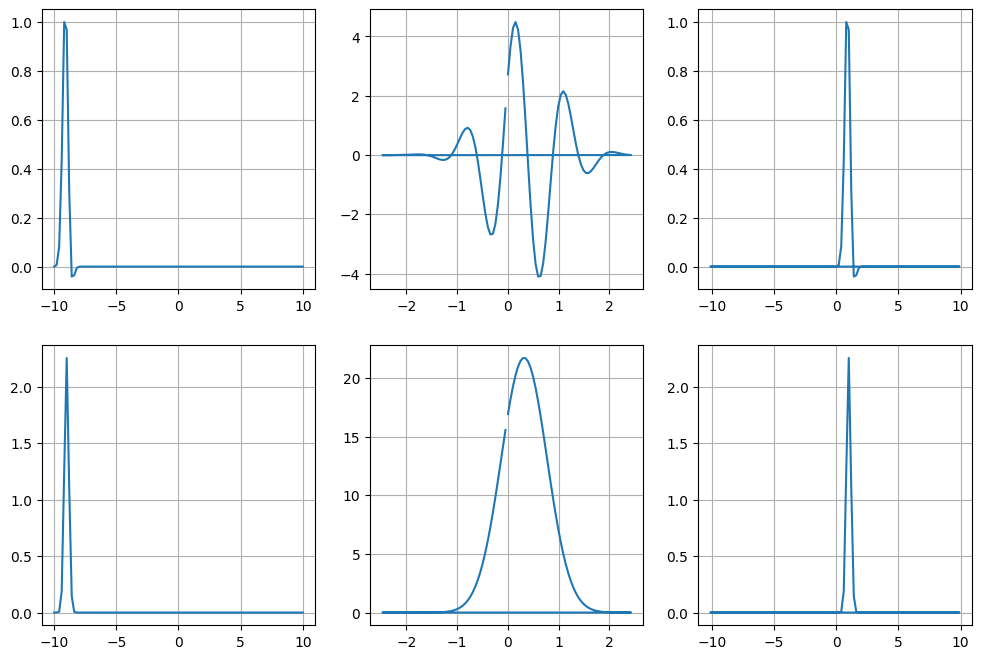

In [44]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.plot(x, psis)
plt.grid()
plt.subplot(232)
plt.plot(k1, ak1)
plt.grid()
plt.subplot(233)
plt.plot(xr1, psisr1)
plt.grid()
plt.subplot(234)
plt.plot(x, np.abs(psis)**2)
plt.grid()
plt.subplot(235)
plt.plot(k1, np.abs(ak1)**2)
plt.grid()
plt.subplot(236)
plt.plot(xr1, np.abs(psisr1)**2)
plt.grid()
plt.show()

Using `scipy.fftpack`

In [45]:
import scipy.fftpack as fftp

In [46]:
ak1 = fftp.fft(psis, x.size*2)
k1 = fftp.fftfreq(x.size*2)
ak = fftp.fftshift(ak1)
k = fftp.fftshift(k1)
xr1 = fftp.fftfreq(k.size)
psisr1 = fftp.ifft(ak)
xr = fftp.ifftshift(xr1)
psisr = fftp.ifftshift(psisr1)

In [47]:
display(simps(np.abs(psisr)**2, xr))

0.024750012843622785

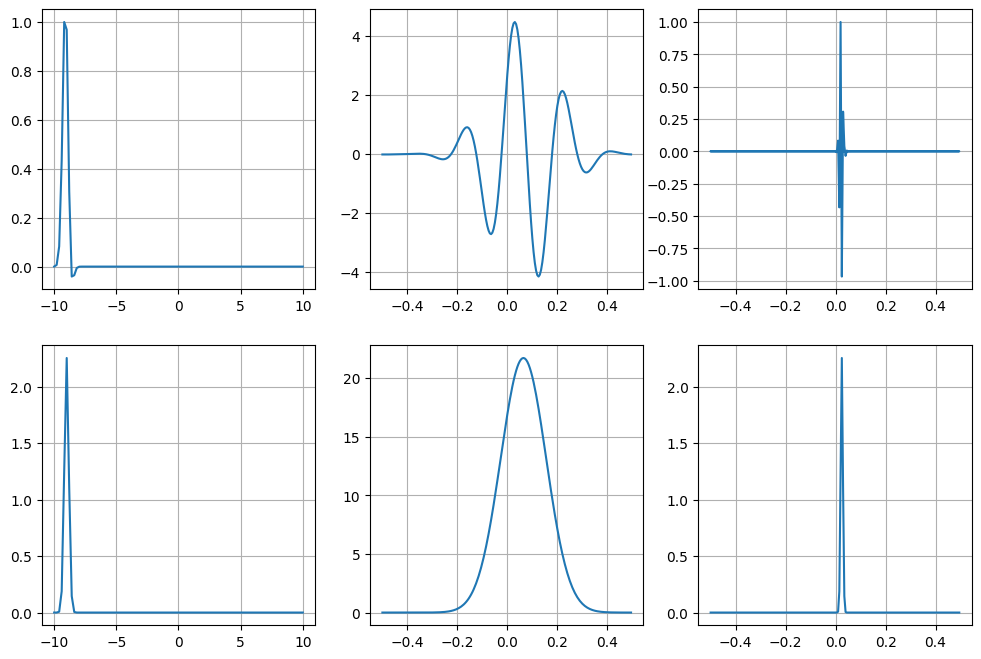

In [48]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.plot(x, psis)
plt.grid()
plt.subplot(232)
plt.plot(k, ak)
plt.grid()
plt.subplot(233)
plt.plot(xr1, psisr1)
plt.grid()
plt.subplot(234)
plt.plot(x, np.abs(psis)**2)
plt.grid()
plt.subplot(235)
plt.plot(k, np.abs(ak)**2)
plt.grid()
plt.subplot(236)
plt.plot(xr, np.abs(psisr)**2)
plt.grid()
plt.show()